In [4]:
import os
import pandas as pd
import plotly.express as px
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv
import geopandas
import matplotlib.pyplot as plt
from descartes import PolygonPatch
import plotly.graph_objects as go
%matplotlib inline

In [5]:
median_csv = Path("../data/cleandata/median_yearly_income.csv")
median_df = pd.read_csv(median_csv)
median_df.head()

ParserError: Error tokenizing data. C error: Expected 10 fields in line 22, saw 17


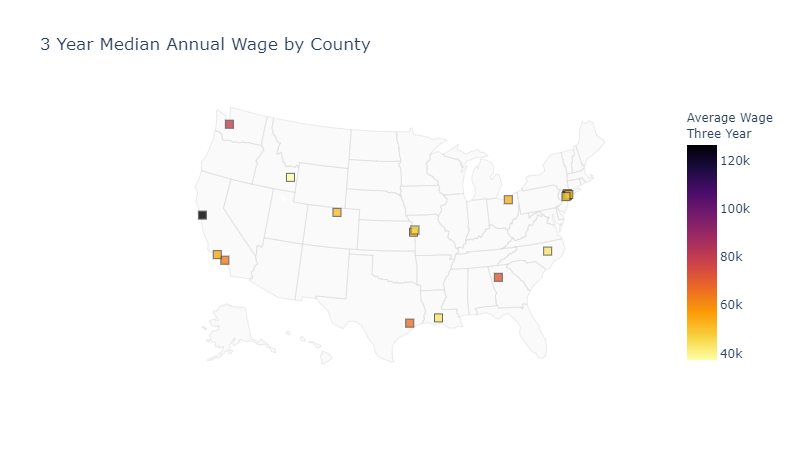

In [60]:
median_df['text'] = median_df['County'] + ' ' + median_df['City'] + ', ' + median_df['State'] + ' ' + 'Median Income: ' + median_df['3_year_wage_avg'].astype(str)
fig = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = median_df['longitude'],
        lat = median_df['latitude'],
        text = median_df['text'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'inferno',
            cmin = median_df['3_year_wage_avg'].min(),
            color = median_df['3_year_wage_avg'],
            cmax = median_df['3_year_wage_avg'].max(),
            colorbar_title="Average Wage<br>Three Year"
        )))

fig.update_layout(
        title = '3 Year Median Annual Wage by County',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )
fig.show()

,zipcode,County,City,State,2020_Year_Wage,2019_Year_Wage,2018_Year_Wage,3_year_wage_avg,latitude,longitude
0,90001,Los_Angeles_County,Los Angeles,CA,68068,61932,59892,63297.33,33.97,-118.24
1,94101,San_Francisco_County,San Francisco,CA,149604,119880,109332,126272.00,37.77,-122.41
2,93001,Ventura_County,Los Angeles,CA,60788,53400,50976,55054.67,34.33,-119.31
3,80528,Larimer_County,Fort Collins,CO,55588,49776,47832,51065.33,40.55,-105.06
4,30369,Fulton_County,Atlanta,GA,96252,72660,45276,71396.00,33.80,-84.47


In [4]:
towers_csv = Path("../data/cellular_towers.csv")
towers_df = pd.read_csv(towers_csv)
towers_df.head()

,X,Y,FID,LICENSEE,CALLSIGN,LOCNUM,LAT_DMS,LATDIR,LON_DMS,LONDIR,...,LOCCITY,LOCCOUNTY,LOCSTATE,NEPA,QZONE,TOWREG,SUPSTRUC,ALLSTRUC,STRUCTYPE,LIC_ID
0,-9025996.215,4710863.700,1,"NEW CINGULAR WIRELESS PCS, LLC",KNKN848,2,"38,55,28",N,"81,4,55",W,...,GRANTSVILLE,CALHOUN,WV,N,NaN,NaN,36.3,37.8,POLE,11497
1,-9048571.812,4669794.346,2,"NEW CINGULAR WIRELESS PCS, LLC",KNKN848,6,"38,38,13",N,"81,17,5",W,...,LOONEYVILLE,ROANE,WV,N,NaN,1002593.0,123.1,125.6,TOWER,11497
2,-9085652.349,4727002.648,3,"NEW CINGULAR WIRELESS PCS, LLC",KNKN848,7,"39,2,14",N,"81,37,4",W,...,MURRAYSVILLE,JACKSON,WV,N,NaN,NaN,55.2,59.1,MAST,11497
3,-9086453.847,4673842.515,4,"NEW CINGULAR WIRELESS PCS, LLC",KNKN848,9,"38,39,55",N,"81,37,30",W,...,KENNA,JACKSON,WV,N,NaN,1034261.0,123.1,125.9,TOWER,11497
4,-9118736.510,4699966.169,5,"NEW CINGULAR WIRELESS PCS, LLC",KNKN848,10,"38,50,54",N,"81,54,54",W,...,MOUNT ALTO,MASON,WV,N,NaN,1219729.0,80.8,83.8,MAST,11497


In [5]:
towers_df.drop(columns = ["X", "Y", "FID", "LICENSEE", "CALLSIGN", "LOCNUM", "LOCADD", "QZONE", "TOWREG", "SUPSTRUC", "ALLSTRUC", "STRUCTYPE", "LIC_ID", "NEPA"], inplace = True)

In [6]:
towers_df.head()

,LAT_DMS,LATDIR,LON_DMS,LONDIR,LOCCITY,LOCCOUNTY,LOCSTATE
0,"38,55,28",N,"81,4,55",W,GRANTSVILLE,CALHOUN,WV
1,"38,38,13",N,"81,17,5",W,LOONEYVILLE,ROANE,WV
2,"39,2,14",N,"81,37,4",W,MURRAYSVILLE,JACKSON,WV
3,"38,39,55",N,"81,37,30",W,KENNA,JACKSON,WV
4,"38,50,54",N,"81,54,54",W,MOUNT ALTO,MASON,WV


In [66]:
counties = ['LOS ANGELES', 'SAN FRANCISCO', 'FORT COLLINS', 'ATLANTA', 'KANSAS CITY', 'LAFAYETTE', 'WILSON', 'NEW YORK', 'CLEVELAND', 'SEATTLE', 'HOUSTON']

la = towers_df.loc[towers_df['LOCCITY'] == 'LOS ANGELES']
sf = towers_df.loc[towers_df['LOCCITY'] == 'SAN FRANCISCO']
fc = towers_df.loc[towers_df['LOCCITY'] == 'FORT COLLINS']
at = towers_df.loc[towers_df['LOCCITY'] == 'ATLANTA']
kc = towers_df.loc[towers_df['LOCCITY'] == 'KANSAS CITY']
lf = towers_df.loc[towers_df['LOCCITY'] == 'LAFAYETTE']
wi = towers_df.loc[towers_df['LOCCITY'] == 'WILSON']
ny = towers_df.loc[towers_df['LOCCITY'] == 'NEW YORK']
cl = towers_df.loc[towers_df['LOCCITY'] == 'CLEVELAND']
se = towers_df.loc[towers_df['LOCCITY'] == 'SEATTLE']
ho = towers_df.loc[towers_df['LOCCITY'] == 'HOUSTON']

con_df = pd.concat([la, sf, fc, at, kc, lf, wi, ny, cl, se, ho], axis = 'index', join = 'inner')
con_df.head()

,LAT_DMS,LATDIR,LON_DMS,LONDIR,LOCCITY,LOCCOUNTY,LOCSTATE
10958,"34,5,29",N,"118,50,12",W,LOS ANGELES,LOS ANGELES,CA
11416,"34,23,11",N,"118,19,47",W,LOS ANGELES,LOS ANGELES,CA
11491,"34,4,35",N,"118,28,8",W,LOS ANGELES,LOS ANGELES,CA
6165,"37,46,55",N,"122,28,28",W,SAN FRANCISCO,SAN FRANCISCO,CA
6169,"37,46,8",N,"122,24,19",W,SAN FRANCISCO,SAN FRANCISCO,CA


In [67]:
con_df["LAT_DMS"] = con_df["LAT_DMS"].str.replace(',', ' ')
con_df["LON_DMS"] = con_df["LON_DMS"].str.replace(',', ' ')
lat = con_df['LAT_DMS'].str.split(" ", n=2,expand=True)
con_df["lat_d"] = lat[0]
con_df["lat_m"] = lat[1]
con_df["lat_s"] = lat[2]
lon = con_df['LON_DMS'].str.split(" ", n=2,expand=True)
con_df["lon_d"] = lon[0]
con_df["lon_m"] = lon[1]
con_df["lon_s"] = lon[2]
con_df.drop(columns=["LAT_DMS", "LON_DMS"], inplace=True)

In [68]:
con_df["lat_d"] = con_df["lat_d"].astype('float64')
con_df["lat_m"] = con_df["lat_m"].astype('float64')
con_df["lat_s"] = con_df["lat_s"].astype('float64')
con_df["lon_d"] = con_df["lon_d"].astype('float64')
con_df["lon_m"] = con_df["lon_m"].astype('float64')
con_df["lon_s"] = con_df["lon_s"].astype('float64')

In [69]:
latd = con_df["lat_d"]
latm = con_df["lat_m"]
lats = con_df["lat_s"]
lond = con_df["lon_d"]
lonm = con_df["lon_m"]
lons = con_df["lon_s"]

for column in con_df:
    con_df['latitude'] = latd + (latm/60) + (lats/3600)
    con_df['longitude'] = -1*(lond + (lonm/60) + (lons/3600))
    
con_df.head()

,LATDIR,LONDIR,LOCCITY,LOCCOUNTY,LOCSTATE,lat_d,lat_m,lat_s,lon_d,lon_m,lon_s,latitude,longitude
10958,N,W,LOS ANGELES,LOS ANGELES,CA,34.0,5.0,29.0,118.0,50.0,12.0,34.091389,-118.836667
11416,N,W,LOS ANGELES,LOS ANGELES,CA,34.0,23.0,11.0,118.0,19.0,47.0,34.386389,-118.329722
11491,N,W,LOS ANGELES,LOS ANGELES,CA,34.0,4.0,35.0,118.0,28.0,8.0,34.076389,-118.468889
6165,N,W,SAN FRANCISCO,SAN FRANCISCO,CA,37.0,46.0,55.0,122.0,28.0,28.0,37.781944,-122.474444
6169,N,W,SAN FRANCISCO,SAN FRANCISCO,CA,37.0,46.0,8.0,122.0,24.0,19.0,37.768889,-122.405278


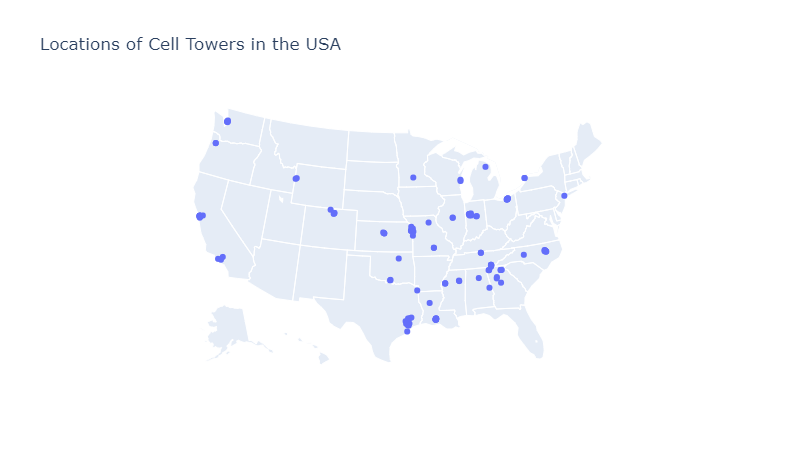

In [72]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
con_df['text'] = con_df['LOCCITY'] + ' ' + con_df['LOCSTATE'] + ' ' + 'CELLTOWER'

fig = go.Figure(data=go.Scattergeo(
        lon = con_df['longitude'],
        lat = con_df['latitude'],
        text = con_df['text'],
        mode = 'markers',
        ))

fig.update_layout(
        title = 'Locations of Cell Towers in the USA',
        geo_scope='usa',
    )
fig.show()